The notebook format is convenient for poking around and getting a feel for the data. We'll go back afterwards and write some proper pre-processing code. 

The [Wikipedia ECG page](https://en.wikipedia.org/wiki/Electrocardiography) really helps to make sense out of the data. It gives just enough domain knowledge to avoid doing anything really dumb here.

If you haven't already, install the [Waveform Database](https://github.com/MIT-LCP/wfdb-python) package for Python:

```bash
python3 -m pip install wfdb
```

This is a library specifically tailored physiological data of the format we'll be working with.

I've downloaded the data to a directory called "data" and unzipped it there. The file "mit-bih-arrhythmia-database-1.0.0/mitdbdir/intro.html" is as thorough and clear a data description as I've ever seen. This dataset has been lovingly cared for.

In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import wfdb

In [2]:
# Check out the data for subject 100
record = wfdb.rdrecord('data/mit-bih-arrhythmia-database-1.0.0/100') 

In [3]:
display(record.__dict__)

{'record_name': '100',
 'n_sig': 2,
 'fs': 360,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 650000,
 'base_time': None,
 'base_date': None,
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'],
 'sig_name': ['MLII', 'V5'],
 'p_signal': array([[-0.145, -0.065],
        [-0.145, -0.065],
        [-0.145, -0.065],
        ...,
        [-0.675, -0.365],
        [-0.765, -0.335],
        [-1.28 ,  0.   ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['100.dat', '100.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [1024, 1024],
 'units': ['mV', 'mV'],
 'adc_res': [11, 11],
 'adc_zero': [1024, 1024],
 'init_value': [995, 1011],
 'checksum': [-22131, 20052],
 'block_size': [0, 0]}

In [4]:
# Channels 0 and 1 contain the data we care about
signals, fields = wfdb.rdsamp('data/mit-bih-arrhythmia-database-1.0.0/100', channels=[0, 1])

In [5]:
signals

array([[-0.145, -0.065],
       [-0.145, -0.065],
       [-0.145, -0.065],
       ...,
       [-0.675, -0.365],
       [-0.765, -0.335],
       [-1.28 ,  0.   ]])

In [6]:
fields

{'fs': 360,
 'sig_len': 650000,
 'n_sig': 2,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV'],
 'sig_name': ['MLII', 'V5'],
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']}

For consistency, we'll focus on the MLII channel in our analysis and modeling.

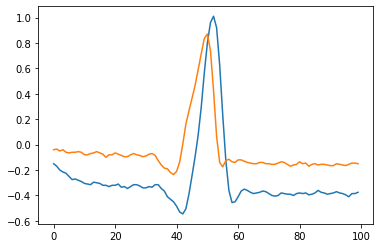

In [7]:
plt.plot(signals[300000:300100, :])

In [8]:
annotation = wfdb.rdann('data/mit-bih-arrhythmia-database-1.0.0/100', 'atr')

In [9]:
display(annotation.__dict__)

{'record_name': '100',
 'extension': 'atr',
 'sample': array([    18,     77,    370, ..., 649484, 649734, 649991]),
 'symbol': ['+',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'A',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N'

In [10]:
annotation.sample.size

2274

In [11]:
len(annotation.symbol)

2274

In [12]:
i_min = 300000
i_max = 301000
mlii_sig = signals[i_min:i_max, 0]
offset = .1
i_ann = np.where(np.logical_and(
    annotation.sample > i_min,
    annotation.sample < i_max))[0]
x_ann = [annotation.sample[i] - i_min for i in i_ann]
y_ann = [mlii_sig[x] + offset for x in x_ann] 
s_ann = [annotation.symbol[i] for i in i_ann]

plt.figure()
ax = plt.gca()
ax.plot(np.arange(i_min, i_max) - i_min, mlii_sig)
for j, i in enumerate(i_ann): 
    ax.text(
        x_ann[j],
        y_ann[j],
        s_ann[j],
        horizontalalignment="center",
    )

For now keep it simple and streamlined.
Our analyses can be extended later to include a wider set of subjects, measurements, and categories.

* Focus on 100-series subjects (not especially selected for pathological conditions).
* Focus on MLII (modified limb lead II) signal only.
* Ignore subjects 102, 104 (MLII not available)
* Ignore subjects 114 (leads reversed)
* Ignore subjects 112, 115 through 124 (recorded at twice real time)

In [13]:
include_ids = [
    100, 101, 103, 105, 106,
    107, 108, 109, 111, 113,
]

id = 100

In [14]:
record = wfdb.rdrecord("data/mit-bih-arrhythmia-database-1.0.0/" + str(id))
annotation = wfdb.rdann("data/mit-bih-arrhythmia-database-1.0.0/" + str(id), "atr")

Text(1003.7305555555556, 1.175, 'N')

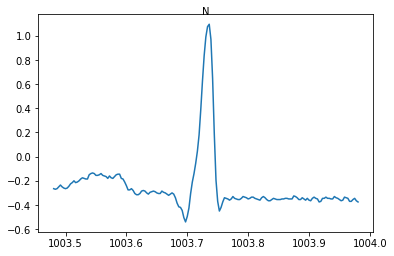

In [44]:
beat_window = 500  # milliseconds
f_samp = 360  # Hz sampling rate
half_sample_window = int(f_samp * beat_window / (2 * 1000))  # samples

n_beats = annotation.sample.size

j_beat = np.random.choice(n_beats)
i_beat = annotation.sample[j_beat]
label = annotation.symbol[j_beat]
i_start = i_beat - half_sample_window
i_end = i_beat + half_sample_window
mlii_sig = signals[i_start: i_end + 1, 0]
time = np.arange(i_start, i_end + 1) / f_samp
offset = .1
t_beat = i_beat / f_samp
y_ann = mlii_sig[half_sample_window + 1] + offset

plt.figure()
ax = plt.gca()
ax.plot(time, mlii_sig)
ax.text(
    t_beat,
    y_ann,
    label,
    horizontalalignment="center",
)

Choosing the window width here is important. Too narrow and we may miss important signal. Too wide and the important signal will get diluted, or worse, we'll get parts of adjacent beats which could conflict.

Using the same size window for every training example ensures a good apples-to-apples comparison between them. No re-centering will be necessary.

Because part of the data preparation was identifying the peak location accurately, we can be confident that the information of interest is centered around each label.  

In [45]:
symbols = np.array(annotation.symbol)
np.unique(symbols)

array(['+', 'A', 'N', 'V'], dtype='<U1')

In [46]:
def get_ann(id):
    ann = wfdb.rdann("data/mit-bih-arrhythmia-database-1.0.0/" + str(id), "atr")
    return ann.sample, ann.symbol

In [47]:
label_count = {}
for id in include_ids:
    label_locs, labels = get_ann(id)
    for label in labels:
        try:
            label_count[label] += 1
        except KeyError:
            label_count[label] = 1
            
print(label_count)

{'+': 50, 'N': 13742, 'A': 42, 'V': 677, '~': 181, '|': 42, 'Q': 7, '/': 2078, 'x': 11, 'F': 4, 'j': 1, 'L': 4615, 'a': 6}


Class balance matters. We'll shoot for the roughly same number of training examples from each class.
We can do some oversampling of smaller classes, but too much oversampling means we're just overfitting to a handful of examples. For now we'll limit ourselves to learning 'N', 'V', '/', and 'L'. We can always extend it to other classes later.

* 'N': 13,742 instances. Normal
* 'L':  4,615 instances. Left bundle branch block
* '/':  2,078 instances. Paced beat
* 'V':    677 instances. Premature ventricular contraction